In [5]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd

/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/stumpy_master_mp_dilation/stumpy/core.py:67: UserWarning: Excluding `['normalize', 'p']` parameters, function `stump_dil(['T_A', 'm', 'T_B', 'ignore_trivial', 'k', 'd']) and function `aamp(['T_A', 'm', 'T_B', 'ignore_trivial', 'k']) have different arguments/parameters.
  warnings.warn(msg)


Discord Index:  102
Discord Value:  5.777989972681973
Motif Pair Indices:  873 681
Motif Pair Value:  4.261998145037639 4.261998145037639


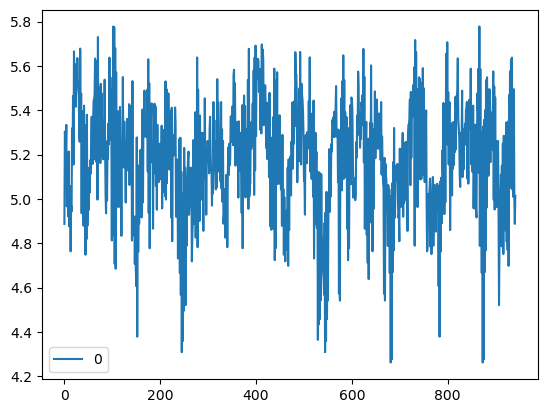

In [7]:
# generate random time series 10.000
T_A = np.random.randint(1,999,1000).astype(np.float64)
# T_A = np.array([1, 0, 5, 0, 3, 9, 0, 1, 9, 3, 1, 0]).astype(np.float64)
# T_B = np.array([1, 3, 5, 7, 9,11,13,15,16,18]).astype(np.float64)
m = 30
d = 2

mp_dil = stumpy.stump_dil(T_A=T_A, m=m, d=d)
discord_idx = np.argsort(mp_dil[:, 0])[-1] # startindex of discord with length m
motif_idx = np.argsort(mp_dil[:, 0])[0] # startindex of motif with length m
motif_nearest_neighbor_idx = mp_dil[motif_idx, 1] # startindex of motif with length m
pd.DataFrame(mp_dil[:,0]).plot()
print("Discord Index: ", discord_idx)
print("Discord Value: ", mp_dil[discord_idx, 0])
print("Motif Pair Indices: ", motif_idx, motif_nearest_neighbor_idx)
print("Motif Pair Value: ", mp_dil[motif_idx, 0], mp_dil[motif_nearest_neighbor_idx, 0])

/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/stumpy_master_mp_dilation/stumpy/core.py:67: UserWarning: Excluding `['normalize', 'p']` parameters, function `stump_dil(['T_A', 'm', 'T_B', 'ignore_trivial', 'k', 'd']) and function `aamp(['T_A', 'm', 'T_B', 'ignore_trivial', 'k']) have different arguments/parameters.
  warnings.warn(msg)


[[0.5033823122771948 6 -1 6]
 [0.41910373374033977 7 -1 7]
 [0.9190171434776796 5 0 5]
 [0.40082888033389286 6 0 6]
 [0.5749199116934373 1 1 7]
 [0.5930606912429773 8 2 8]
 [0.40082888033389286 3 3 8]
 [0.41910373374033977 1 1 9]
 [0.5930606912429773 5 5 -1]
 [0.7475294984100299 5 5 -1]]


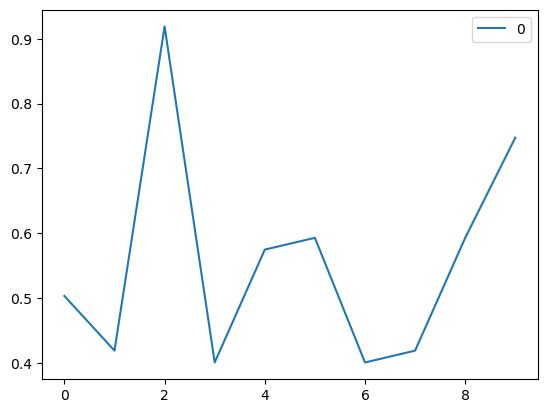

In [6]:
T_A = np.array([1, 0, 5, 3, 3, 1, 0, 1, 9, 3, 1, 0]).astype(np.float64)
# T_B = np.array([1, 3, 5, 7, 9,11,13,15,16,18]).astype(np.float64)
m = 3
d = 1

mp_dil = stumpy.stump_dil(T_A=T_A, m=m, d=d)
pd.DataFrame(mp_dil[:,0]).plot()
print(mp_dil)

# mp = stumpy.stump(T_A=T_A, m=m)
# pd.DataFrame(mp[:,0]).plot()
# print(mp)


# mp[mp_idx, 0] -> Euclidean Distance
# mp[mp_idx, 1] -> Index Nearest Neighbor
# mp[mp_idx, 2] -> Index “left” Nearest Neighbor for self-join
# mp[mp_idx, 3] -> Index “right” Nearest Neighbor for self-join
# bei AB-join: len(A) >= len(B)

### Visualise Discord and Motif Pair ###

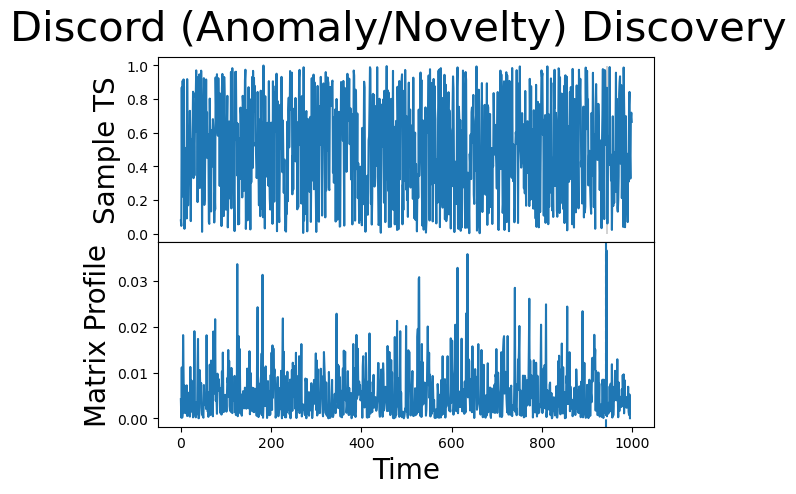

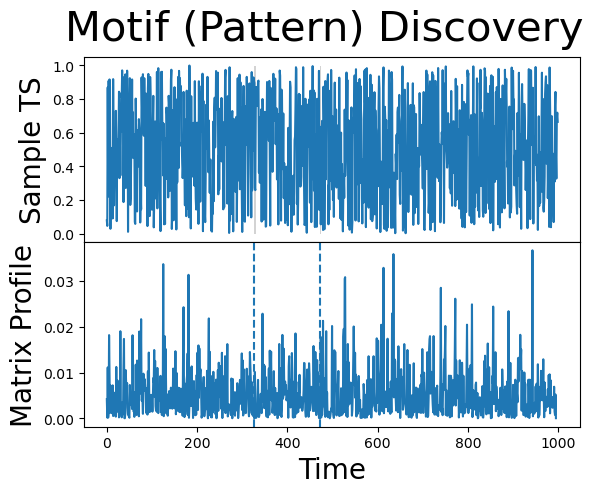

In [8]:
mp = mp_dil

def visualise_discord(mp):
    # the global maximum from the matrix profile correspond to the discord
    discord_idx = np.argsort(mp[:, 0])[-1] # startindex of dis cord with length m

    ## Visualize Discord ##
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
    plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

    axs[0].plot(T_A)
    axs[0].set_ylabel('Sample TS', fontsize='20')
    rect = Rectangle((discord_idx, 0), m, np.amax(T_A), facecolor='lightgrey')
    axs[0].add_patch(rect)
    axs[1].set_xlabel('Time', fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].axvline(x=discord_idx, linestyle="dashed")
    axs[1].plot(mp[:, 0])
    plt.show()
def visualise_motif_pair(mp) -> None:
    # the global minima from the matrix profile correspond to the locations of the two subsequences that make up the motif pair
    motif_idx = np.argsort(mp[:, 0])[0] # startindex of motif with length m
    motif_nearest_neighbor_idx = mp[motif_idx, 1] # startindex of motif with length m

    ## Visualize Motifs ##
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
    plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

    axs[0].plot(T_A)
    axs[0].set_ylabel('Sample TS', fontsize='20')
    rect = Rectangle((motif_idx, 0), m, np.amax(T_A), facecolor='lightgrey')
    axs[0].add_patch(rect)
    rect = Rectangle((motif_nearest_neighbor_idx, 0), m, np.amax(T_A), facecolor='lightgrey')
    axs[0].add_patch(rect)
    axs[1].set_xlabel('Time', fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].axvline(x=motif_idx, linestyle="dashed")
    axs[1].axvline(x=motif_nearest_neighbor_idx, linestyle="dashed")
    axs[1].plot(mp[:, 0])
    plt.show()

visualise_discord(mp)
visualise_motif_pair(mp)